# Try this:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq

Last time, you worked my fit coefficient data.  Let's see if K-means can tell us anything interesting about those data.

Use the "eigen_target.dat" data set, but instead of using just the first eigenvector fit coefficients (as as you did in the lecture10 notebook), use all 5, i.e., all 5 columns.  Just work on the "target" data, not the "comparison" data (unless you feel like it.)

1. Perform K-means cluster analysis, and see if there is an optimal number of clusters.   Visualize the result by plotting the data.  Because there are 5 properties, there are 24 possible plots, so only plot the second and subsequent columns against the first column.

2. As we will learn when we talk about the origin of the data set, there is reason to believe that the data are not of all equal weight in describing what is going on with the data, but rather than there is a hierarchy, where the fit coefficients for the first eigenvector is more important than the fit coefficients for the second, and so on.  Moreover, we will want to use the resulting centroids.  So perform the K-means analysis without normalizing or scaling, see if there is an optimal number of clusters, and visualize the result.

3. Is there any difference between the results for 1 and 2?  Which do you think works better for the data?  Discuss.

In [2]:
fn = '../../lectures/lecture10/eigen_target.dat'
eig = np.loadtxt(fn)

n_dim = eig.shape[1]

mean = np.mean(eig, axis=0)
std = np.std(eig, axis=0)
scaled_eig = (eig - mean) / std

In [3]:
def centroid_var(data, centroid):
    sumterms = (data - centroid)**2
    N = len(data)
    var = np.sum(sumterms, axis=0)
    return var.sum()

def total_variance(data, n_components):
    centroids, _ = kmeans(data, n_components)
    ids, _ = vq(data, centroids)
    variances = np.array([centroid_var(data[ids==i], centroids[i])
                          for i in range(n_components)])
    return variances.sum()

global_var = centroid_var(eig, mean)
global_scaled_var = centroid_var(scaled_eig, np.zeros(n_dim))

Below I make a plot in the same way as the lecture that shows the percentage of variance explained compared to $K=1$ as a function of $K$. In the case of normalizing/scaling the data prior to calculating the $K$-means clusters, I find that at about $K=4$ clusters the variance explained begins to plateau, so I chose this as the "optimal" number of clusters.

I feel like there is a better and more consistent metric such as Sillhouette score, however I just stuck with the method given in the lecture.

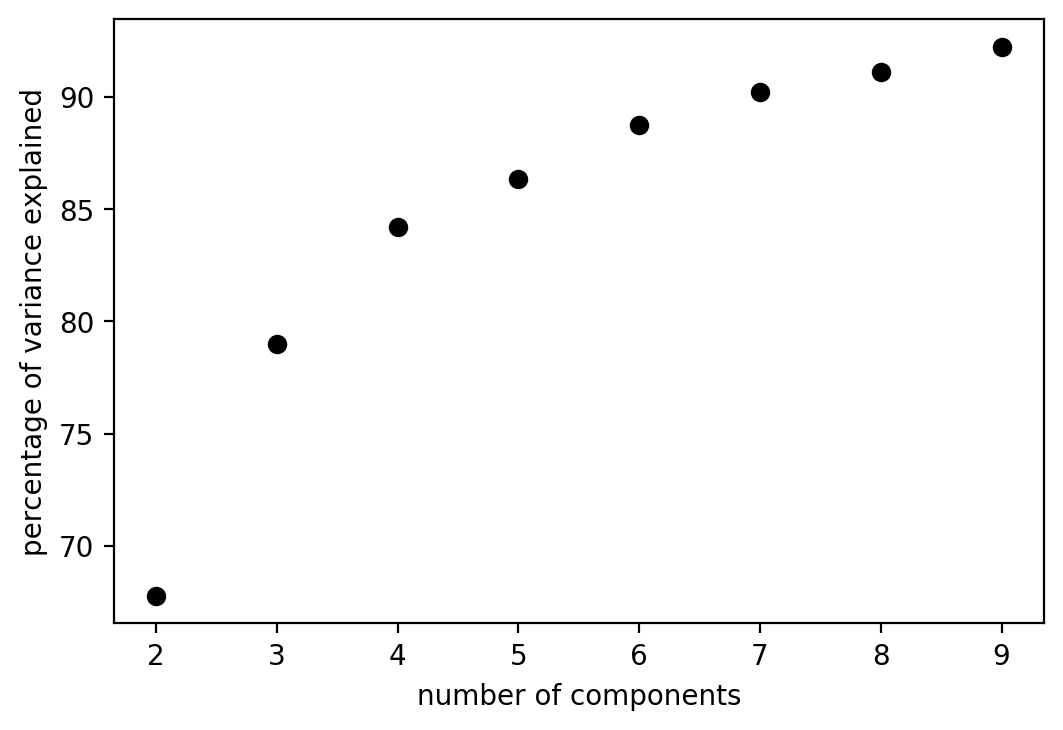

In [4]:
n_components = np.arange(2, 10)
total_var = np.array([total_variance(scaled_eig, n) for n in n_components])
p_diff = (global_scaled_var - total_var) * 100 / global_scaled_var

fig, ax = plt.subplots(dpi=200)

ax.plot(n_components, p_diff, 'ko')

ax.set_xlabel('number of components')
ax.set_ylabel('percentage of variance explained')

plt.show()

Below I plot the four clusters in the 5D space (all as a function of the first coefficient).

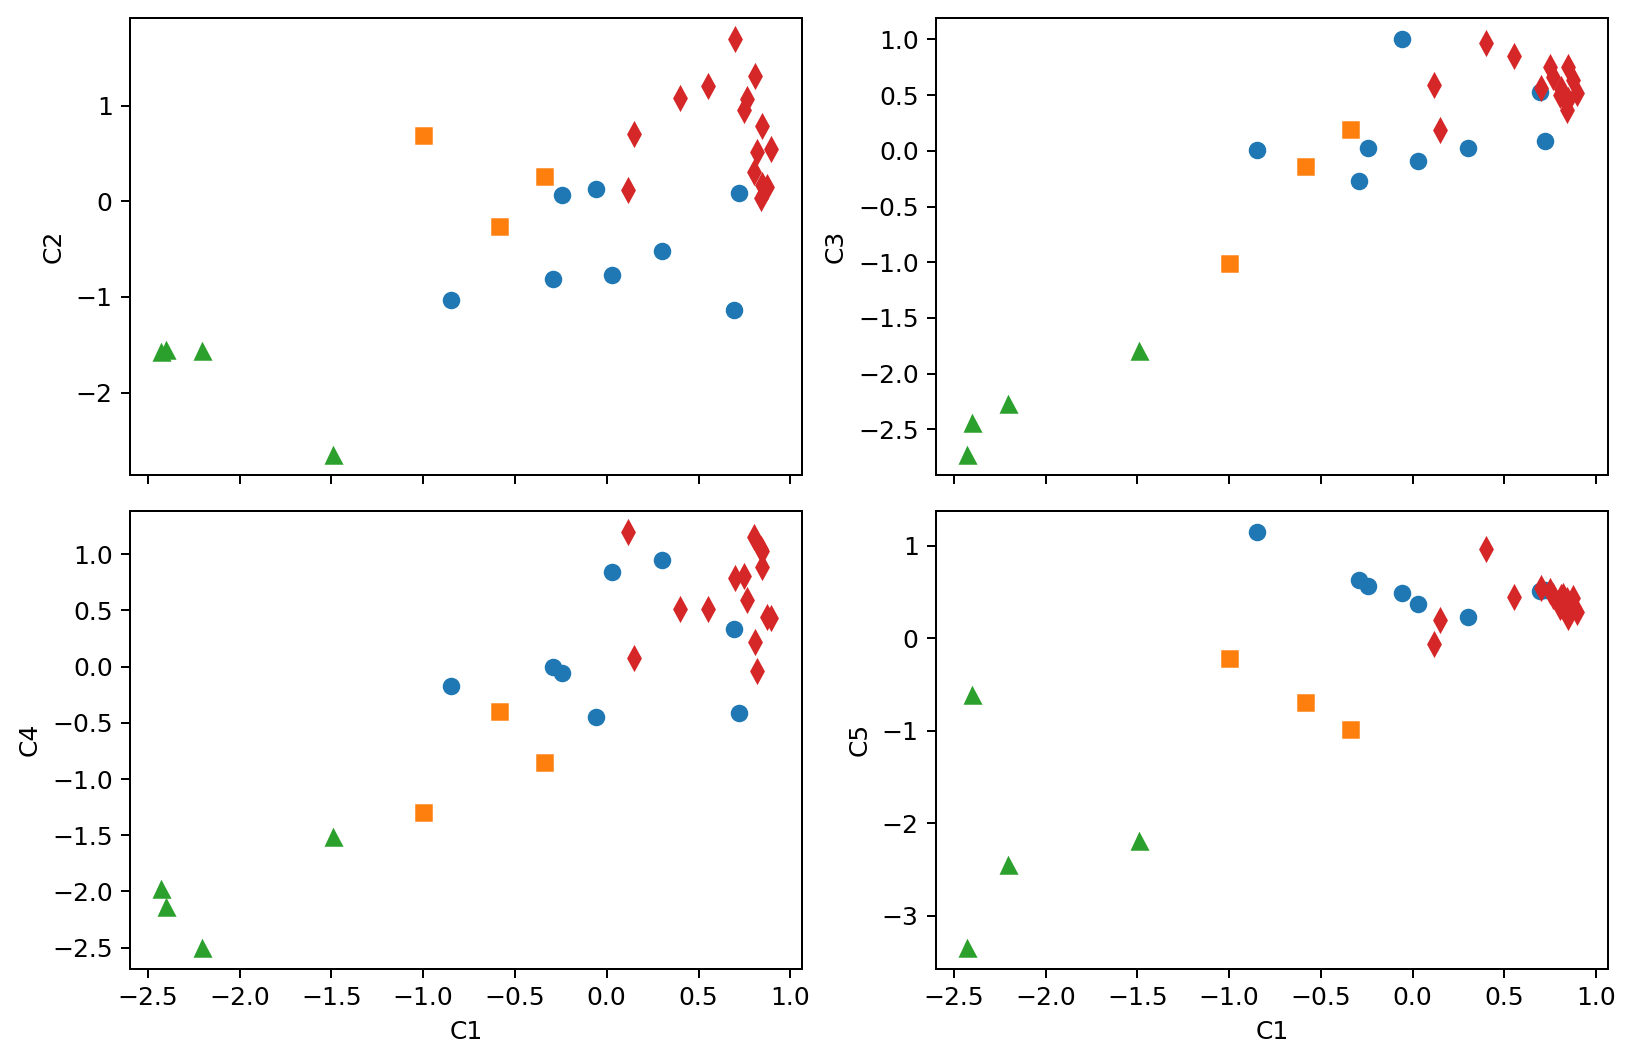

In [5]:
n_comp = 4
centroids, _ = kmeans(scaled_eig, n_comp)
ids, _ = vq(scaled_eig, centroids)

fig, ax = plt.subplots(2, 2, figsize=(9, 6), dpi=180, sharex=True)

markers = ('o', 's', '^', 'd')

def make_plot(axis, data, ind):
    for i in range(n_comp):
        mask = ids == i
        axis.plot(data[mask][:, 0], data[mask][:, ind], markers[i])
    
    axis.set_ylabel(f'C{ind + 1}')

[make_plot(_ax, scaled_eig, i + 1) for i, _ax in enumerate(ax.ravel())]

[_ax.set_xlabel('C1') for _ax in ax[1]]

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.show()

Here I do the same method, however with unscaled data. In this case it seems like $K=3$ works the best.

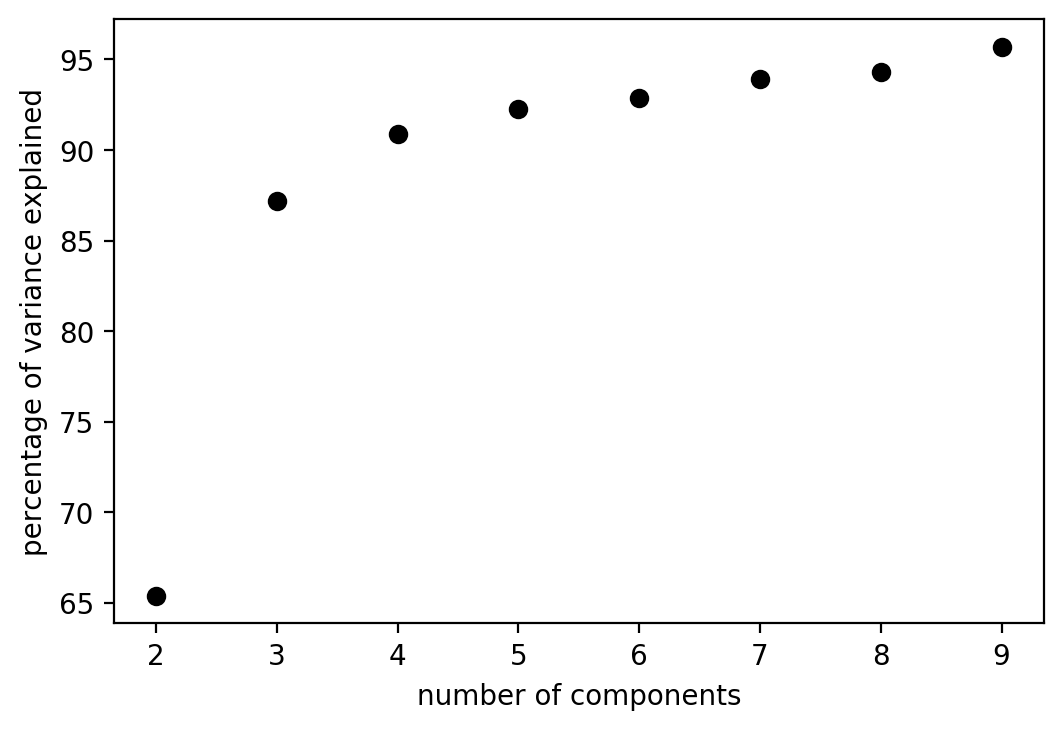

In [6]:
total_var = np.array([total_variance(eig, n) for n in n_components])
p_diff = (global_var - total_var) * 100 / global_var

fig, ax = plt.subplots(dpi=200)

ax.plot(n_components, p_diff, 'ko')

ax.set_xlabel('number of components')
ax.set_ylabel('percentage of variance explained')

plt.show()

Again, I've plotted the unscaled coefficients and the clusters for the 5D space.

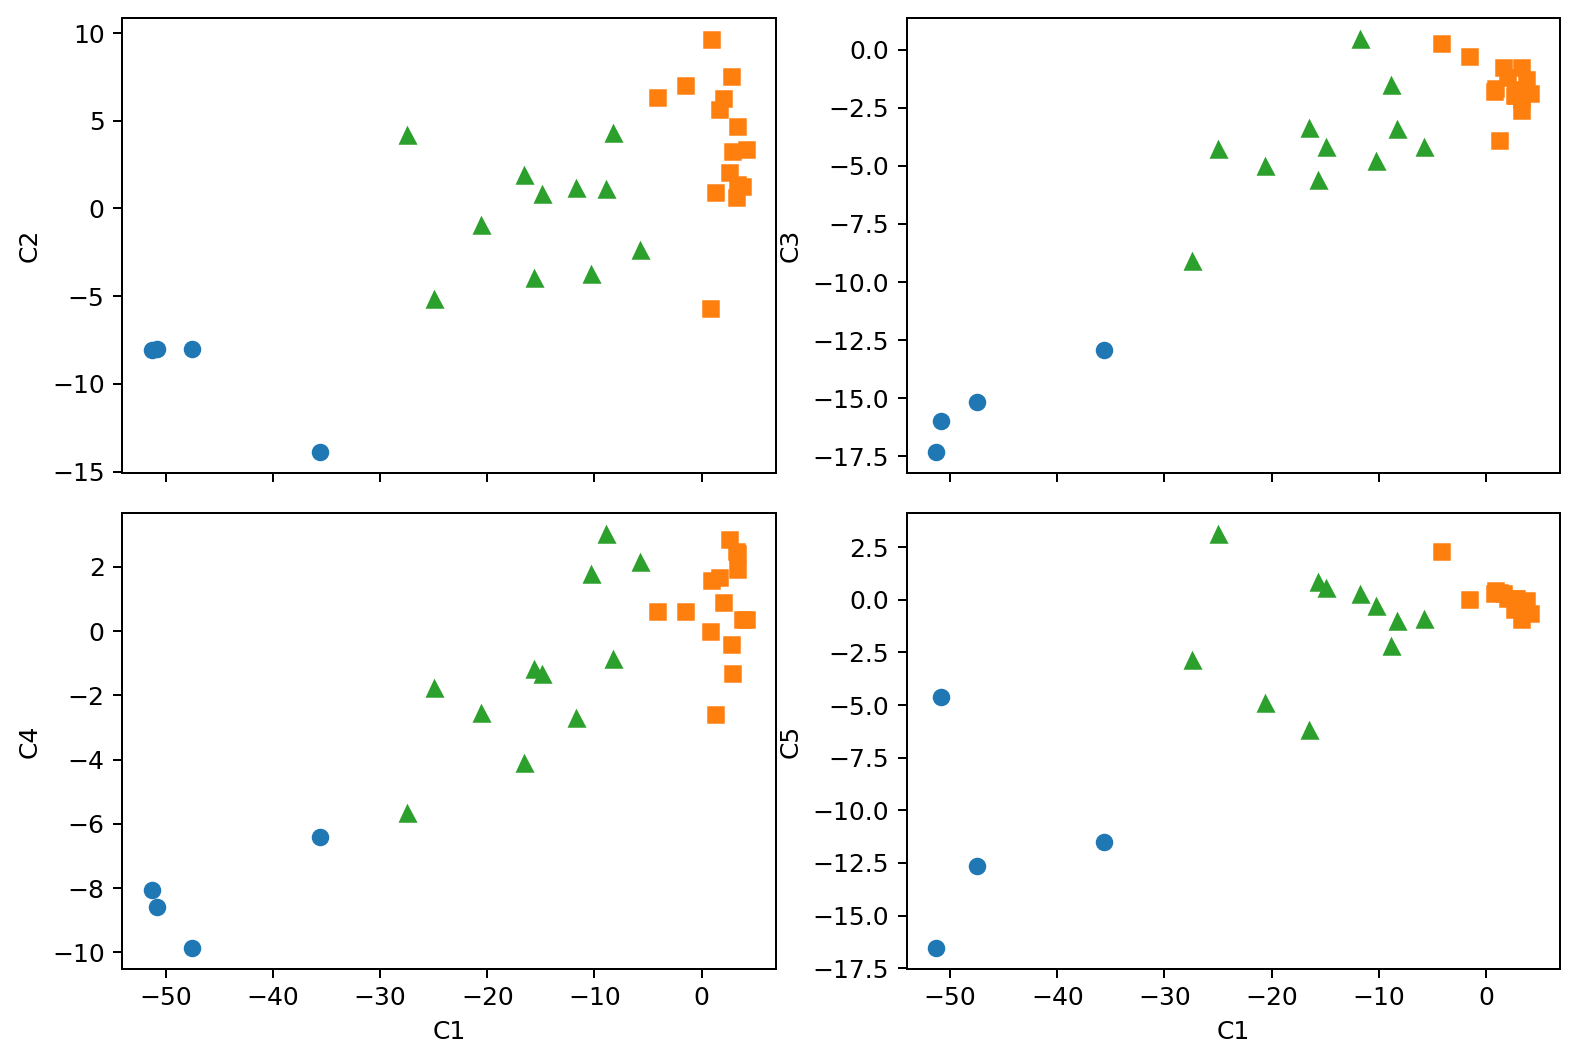

In [7]:
n_comp = 3
centroids, _ = kmeans(eig, n_comp)
ids, _ = vq(eig, centroids)

fig, ax = plt.subplots(2, 2, figsize=(9, 6), dpi=180, sharex=True)

[make_plot(_ax, eig, i + 1) for i, _ax in enumerate(ax.ravel())]

[_ax.set_xlabel('C1') for _ax in ax[1]]

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.show()

We see that a huge difference in scaling versus not scaling is the optimal number of clusters that describe the similiarity between data.

I would say that visually the $K=3$ case seems to create more discrete groupings in each dimension, which leads me to believe that it describes the data better. It also explains more of the variance of $K=1$. However, it depends on the nature of the data and experiment itself, whether normalizing or not normalizing the data is more appropriate. It is also difficult to tell in a 5D space whether something describes the data better or not.